<a href="https://colab.research.google.com/github/SBiscardi/cd-202202-santiago-biscardi/blob/master/Taller3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
pip install pyproj


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [189]:
import pandas as pd
from IPython.core.display import Math
from numpy import mat

In [190]:
ruta = 'https://foscalinternacional.com/datasets/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)


In [191]:
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [192]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [193]:
from datetime import datetime

In [251]:
from datetime import datetime
df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")


In [195]:
import pyproj
P=pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [252]:
df['x'], df['y']=P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,conducta,latitud,longitud,fecha_contagio2,x,y,distancia,fec_not2,inicio_sintomas2,fec_hos_2
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,1. Ambulatorio,7.076011,-73.102501,2020-01-17,709584.027559,782579.281866,1056321.650279,2020-01-17,2020-01-10,NaT
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,1. Ambulatorio,7.079495,-73.105400,2020-01-10,709262.121378,782963.354103,1056390.043202,2020-01-10,2020-01-07,NaT
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,1. Ambulatorio,7.090290,-73.091003,2020-01-12,710847.924654,784163.825097,1058344.476722,2020-01-12,2020-01-08,NaT
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,1. Ambulatorio,7.067435,-73.090958,2020-01-10,710863.366771,781635.895608,1056483.37593,2020-01-12,2020-01-06,NaT
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,709314.159319,781570.969374,1055393.534299,2020-01-10,2020-01-07,2020-01-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1. Ambulatorio,7.072610,-73.099487,2020-03-06,709918.546763,782204.438977,1056268.801837,2020-03-07,2020-03-03,NaT
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,709466.644754,781388.734012,1055361.101047,2020-03-13,2020-03-06,2020-03-13
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,1. Ambulatorio,7.091391,-73.103264,2020-03-08,709492.782783,784279.996264,1057520.911542,2020-03-08,2020-03-04,NaT
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,1. Ambulatorio,7.061083,-73.097000,2020-03-11,710198.574916,780930.648555,1055514.343923,2020-03-11,2020-03-05,NaT


In [253]:
lat_alcaldia = 7.06
lon_alcaldia = 73.08
x_alcaldia, y_alcaldia = P(lon_alcaldia, lat_alcaldia)
x_alcaldia, y_alcaldia

(4217603.760073725, 19077136.29452536)

In [199]:
df['distancia'] = None

In [200]:
import math
from math import e,pi

In [201]:
for i in range(df.shape[0]):
  df.loc[i,'distancia'] = math.sqrt(((df['x'][i] - lat_alcaldia)**2) +((df['y'][i] - lon_alcaldia)**2))


In [202]:
datosf = df
datosf = datosf.select_dtypes(exclude=['object','datetime64'])
datos = datosf.drop('año', axis=1)
datosf = datosf.drop('cod_pais_o', axis=1)
datosf = datosf.drop('condicion_final', axis=1)
datosf = datosf.drop('fecha_defuncion', axis=1)
datosf = datosf.drop('certif_defuncion', axis=1)

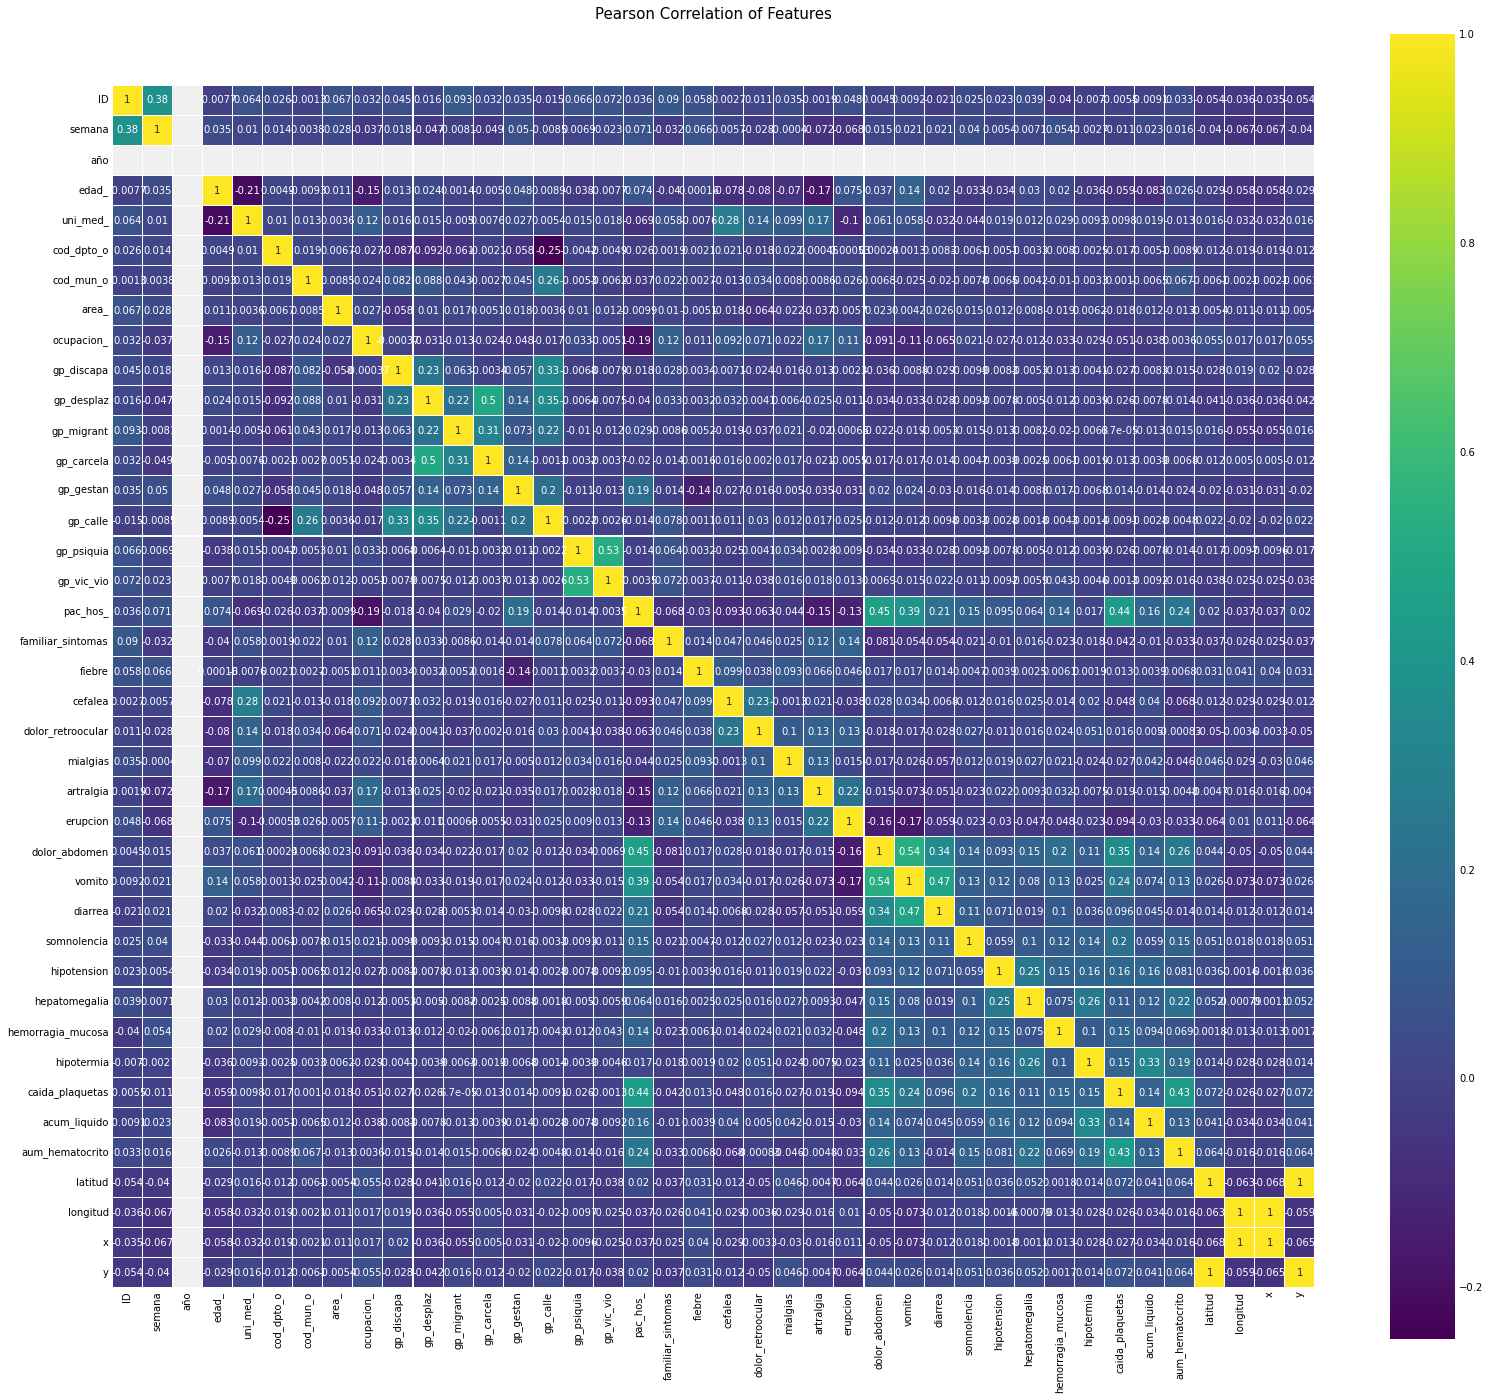

In [203]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb

colormap = plt.cm.viridis
plt.figure(figsize=(24,24))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(datosf.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, cmap=colormap,linecolor="white",annot=True)


In [204]:
from math import ceil,floor

In [205]:

print(df['x'].min())
print(df['y'].min())
print(df['x'].max())
print(df['y'].max())
ab=100
#Resta y suma
min_x = (df['x'].min()-ab)
min_y =(df['y'].min()-ab)
max_x =(df['x'].max()+ab)
max_y = (df['y'].max()+ab)



707988.5715792507
780501.6340403266
712363.8865034583
785051.1759298786


In [255]:
from math import ceil 
res = 10
kernel = 1
len_x=ceil((max_x-min_x)/res)
len_y=ceil((max_y-min_y)/res)
print(len_x)
print(len_y)


458
475


In [207]:
#Rellenamos la matriz de 0's y la imprimimos
import numpy as np

M1 = [[0 for i in range(len_y)] for j in range(len_x) ]
print(M1)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [256]:
#Colocamos en un punto un valor que representan los casos y lo imprimimos en un mapa de calor
from math import floor

for i in range(df.shape[0]):
  posX = floor((df.loc[i, 'x'] - min_x) / res)
  posY = floor((df.loc[i, 'y'] - min_y) / res)
  M1[posX][posY] += 1
print(posX,posY)

413 69


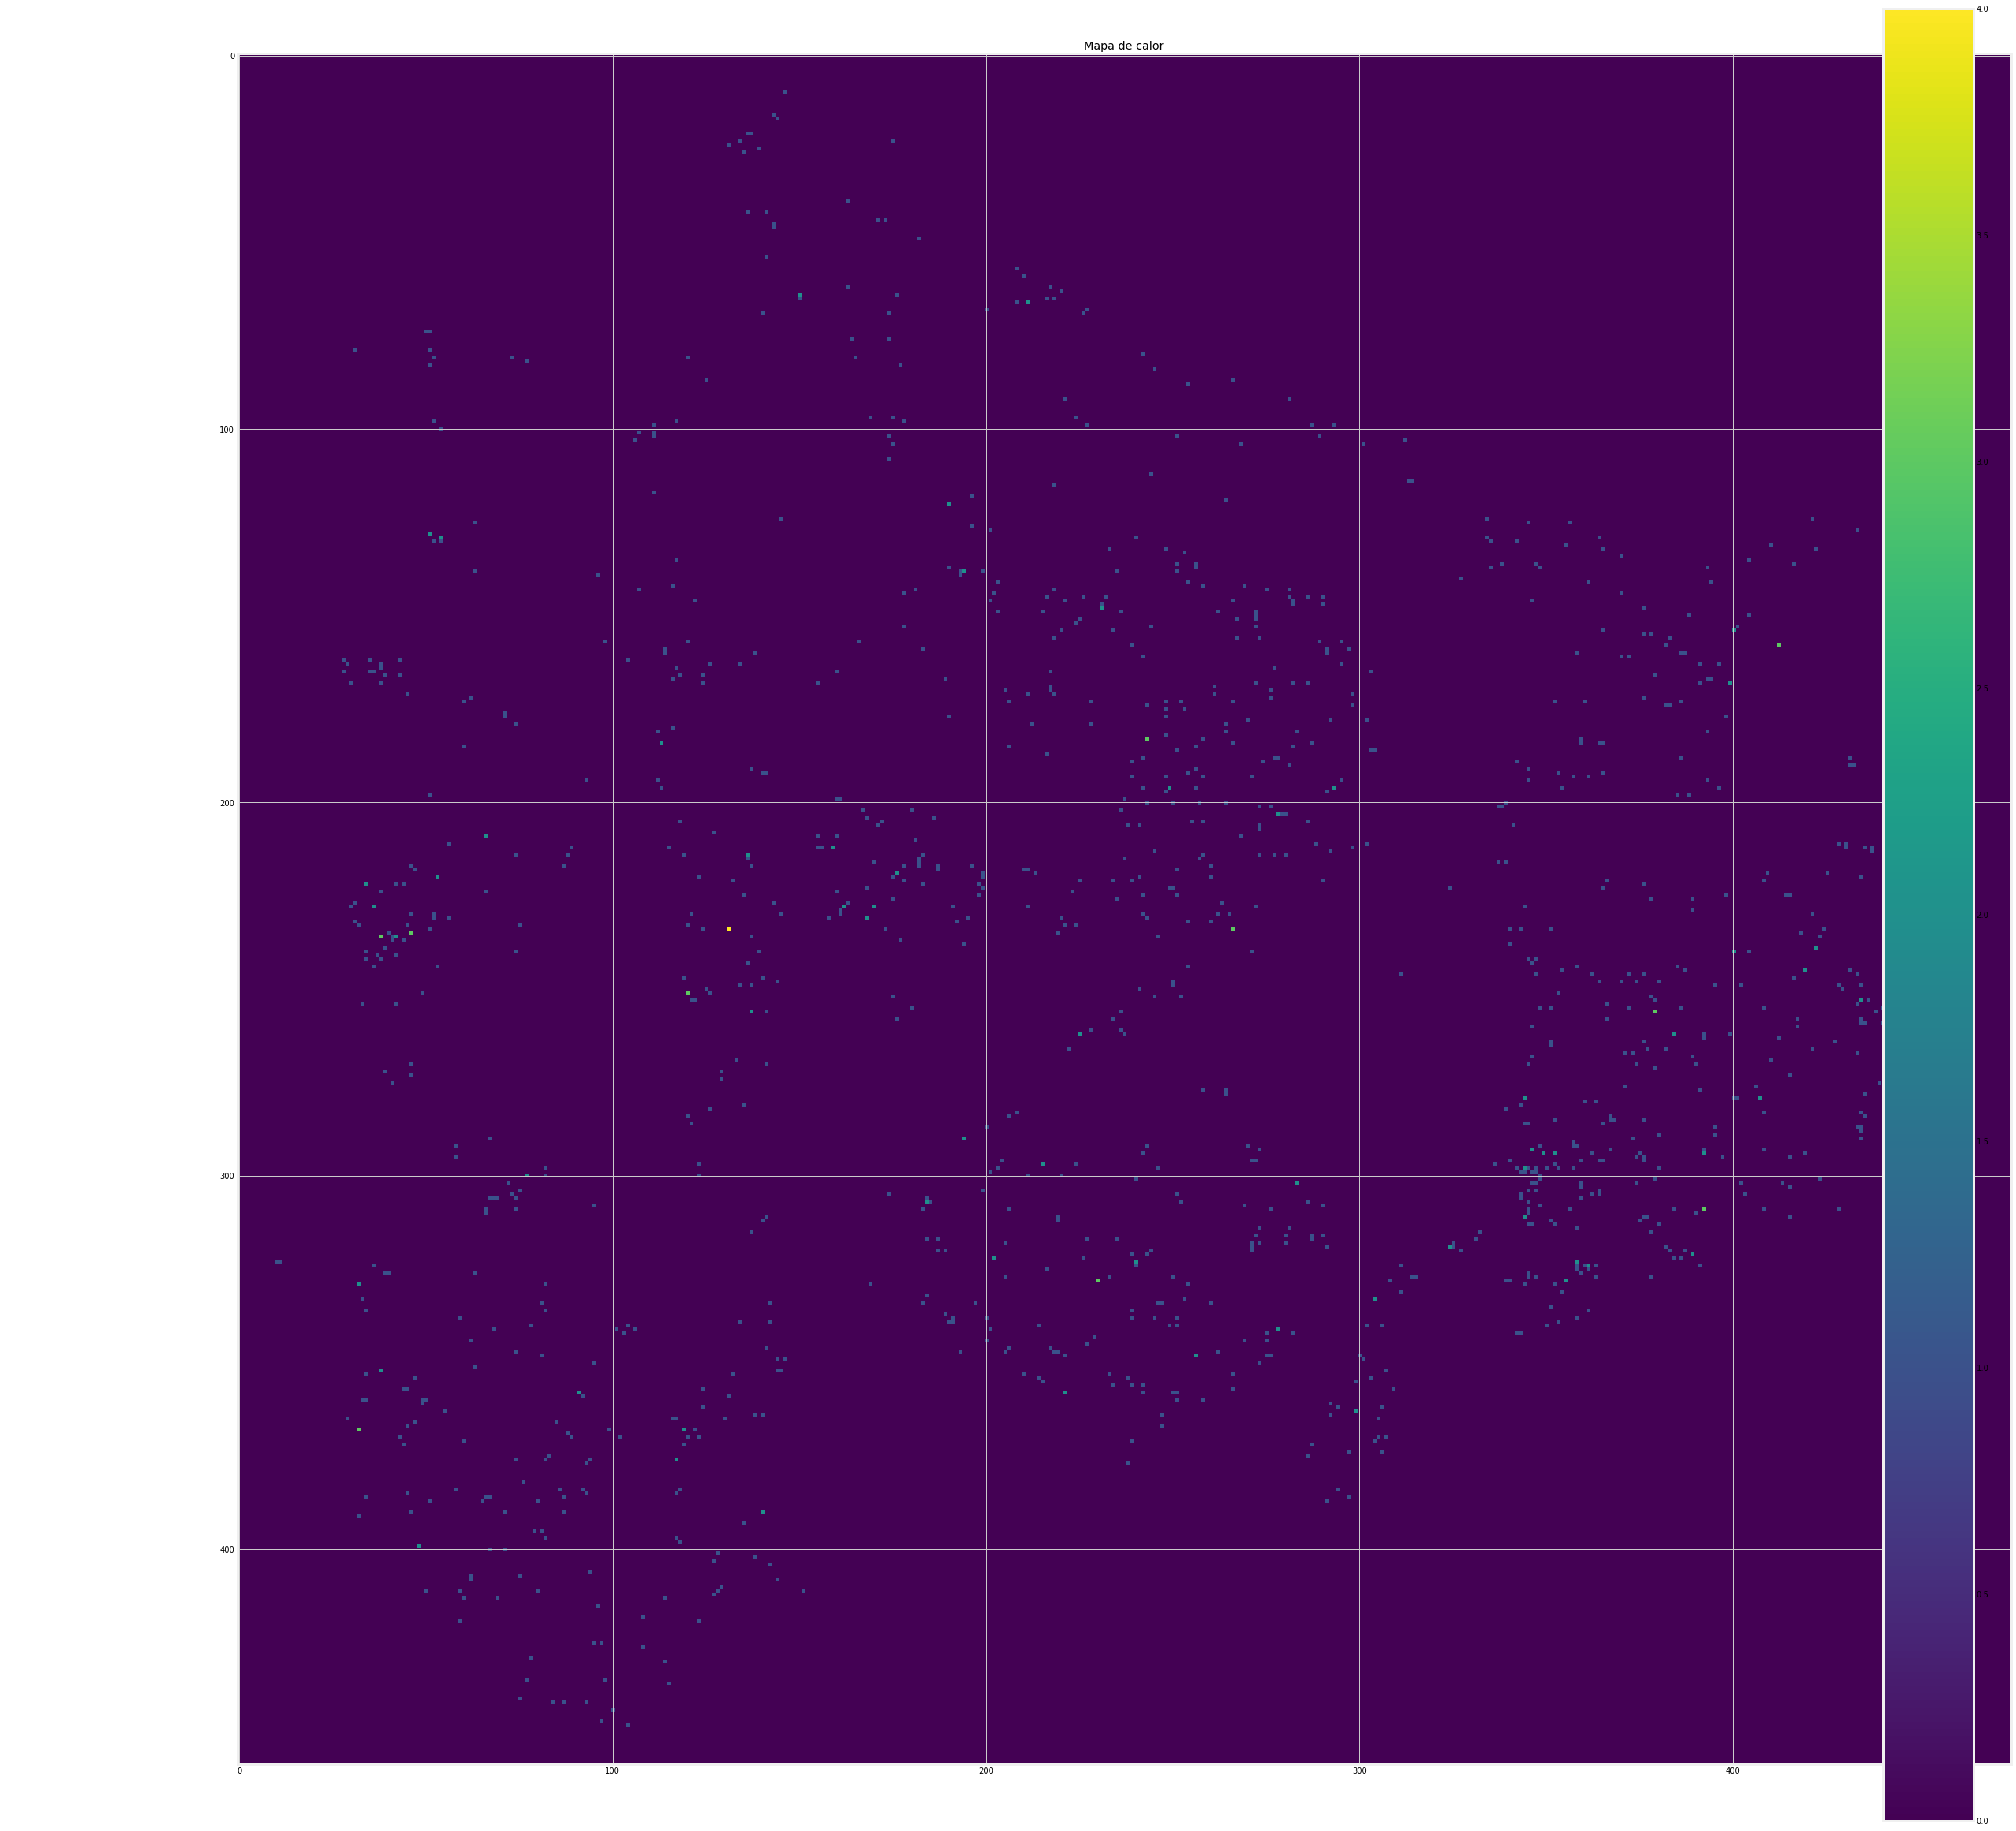

In [209]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50, 40))

ax = fig.add_subplot(111)
ax.set_title('Mapa de calor')
plt.imshow(M1)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [273]:
from math import sqrt
M2 = [[0 for i in range(len_y)] for j in range(len_x) ]
r = int(ab/res)
for i in range(len(M1)):
  for j in range(len(M1[0])):
      if M1[i][j] > 0:
        for k in range(i-r, i+r):
          for l in range(j-r, j+r):
            dis = sqrt(((i-k)**2) + ((j-l)**2)) *res
            if dis <= ab:
              M2[k][l] += M1[i][j]

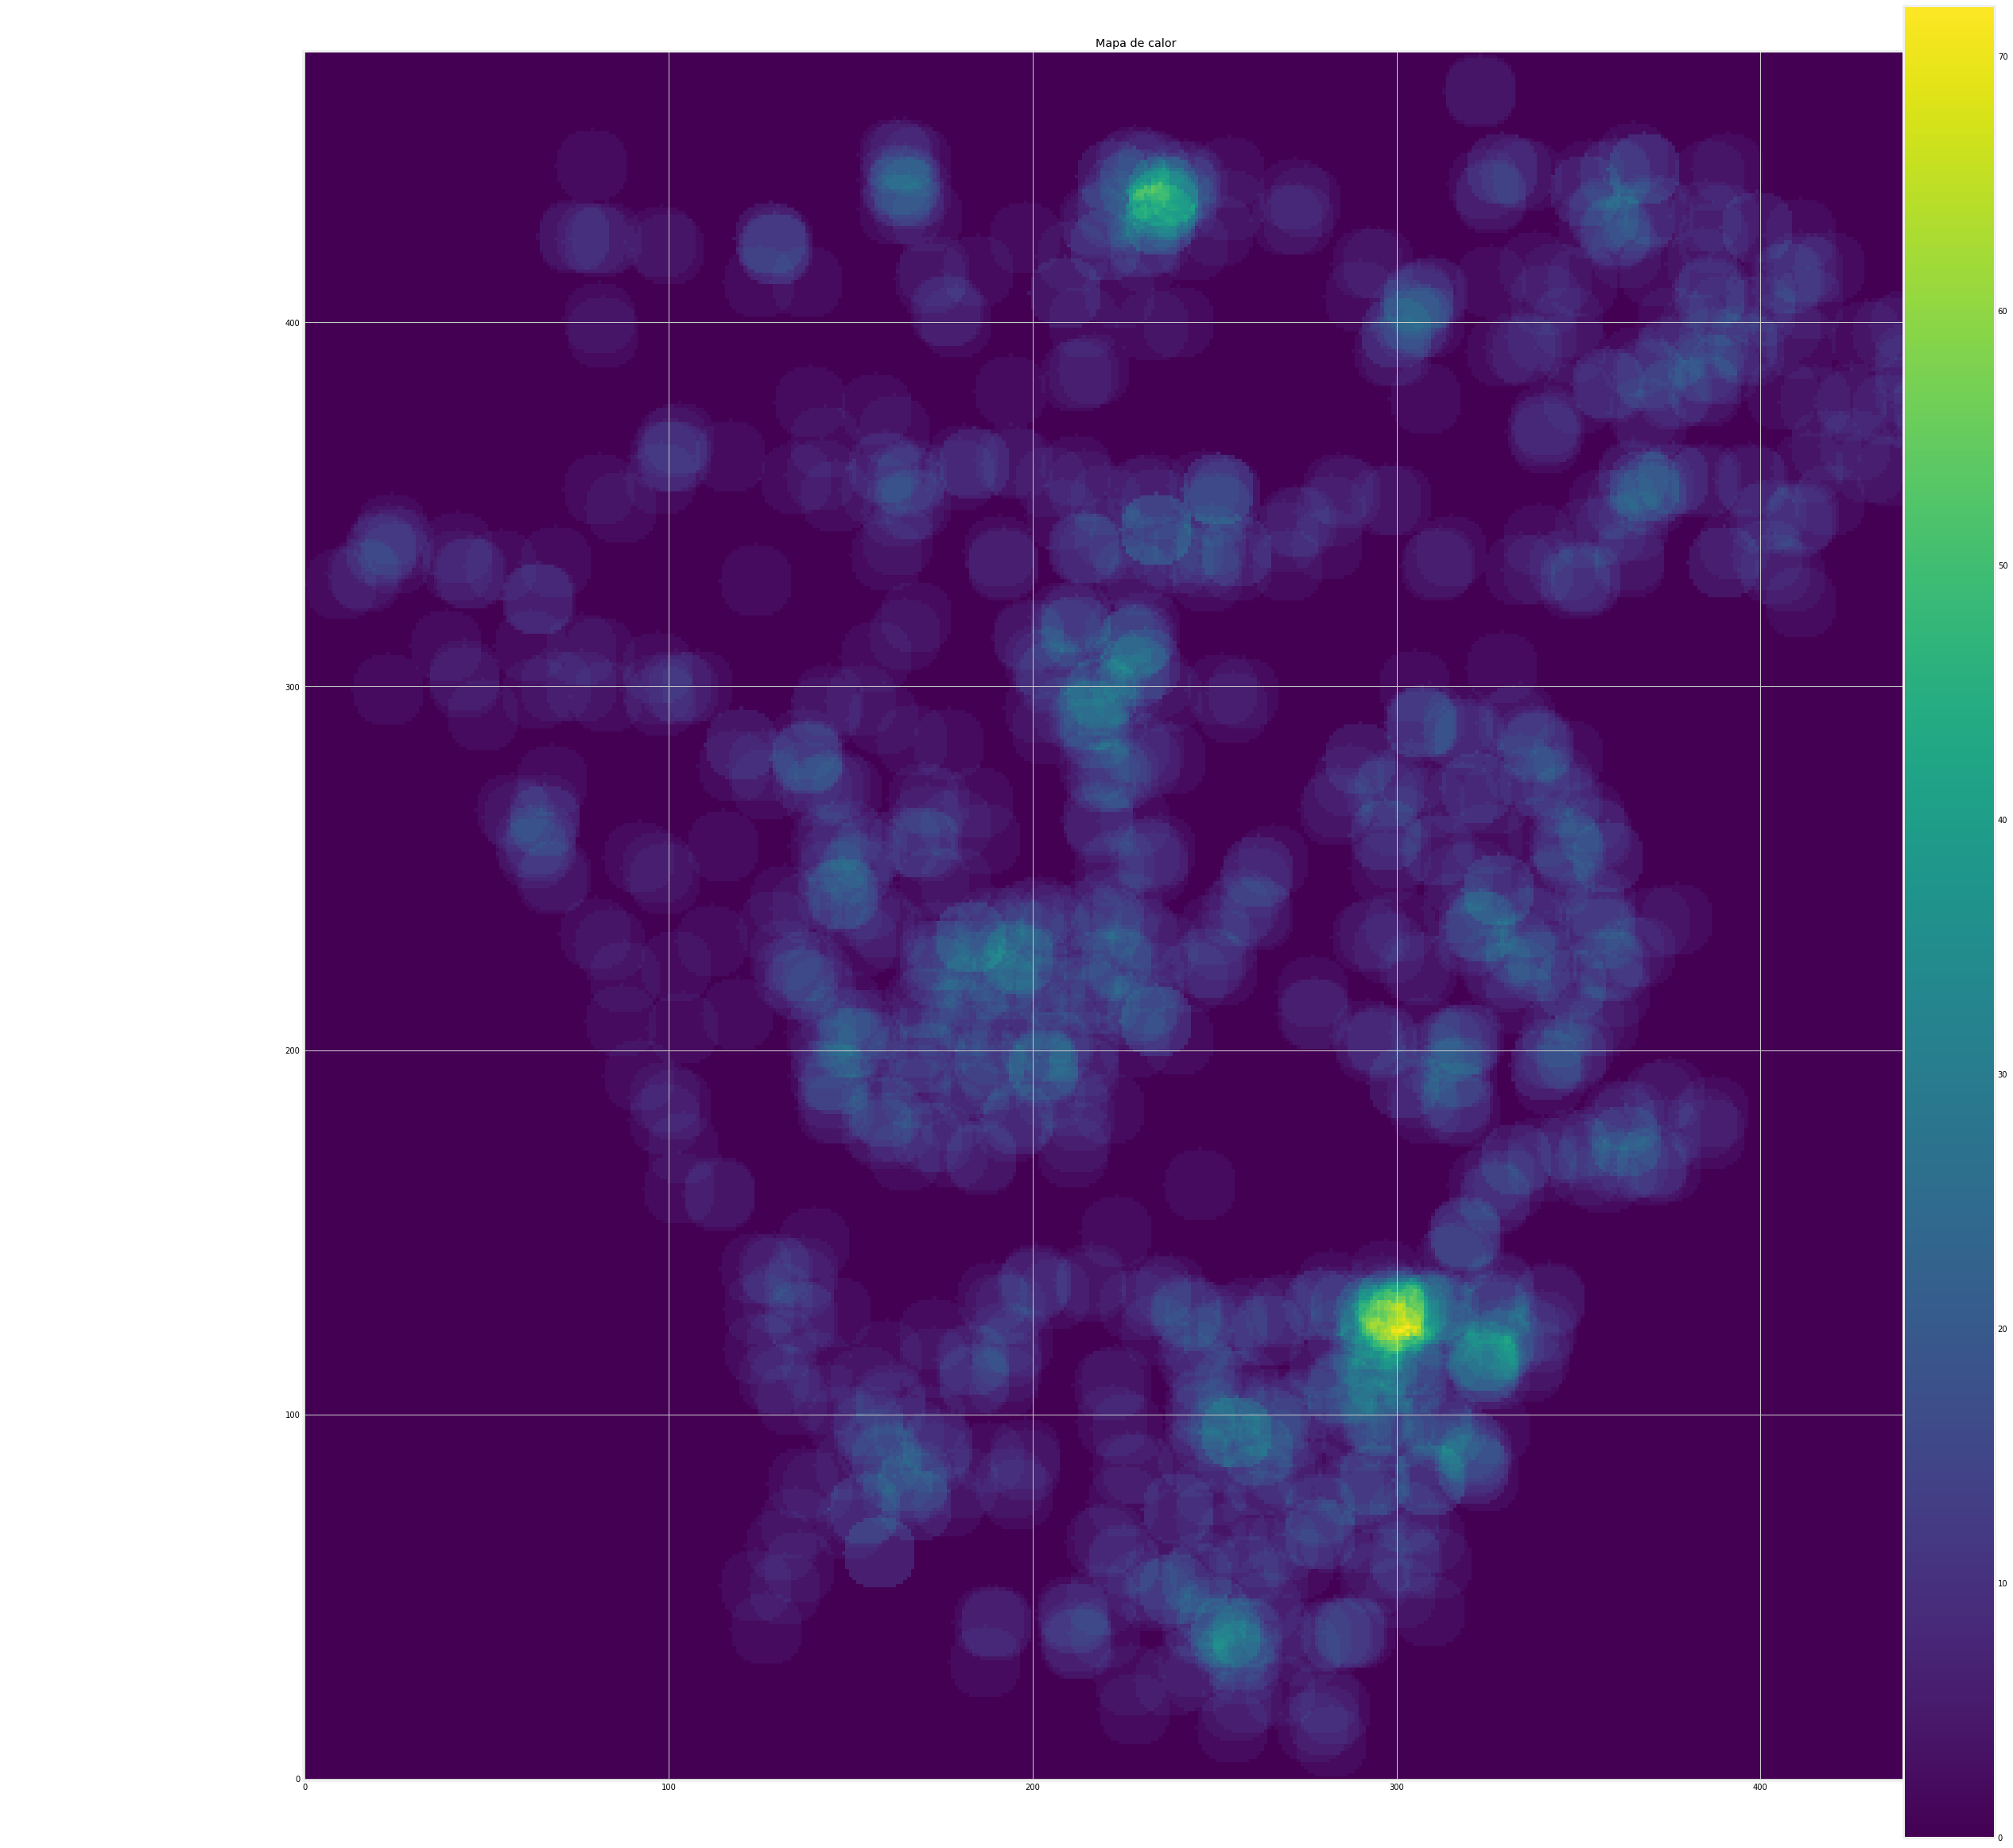

In [274]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50, 40))
p = list(zip(*M2))[::-1]
ax = fig.add_subplot(111)
ax.set_title('Mapa de calor')
plt.imshow(p)
ax.set_aspect('equal')
ax.reset_position
ax.invert_yaxis()

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

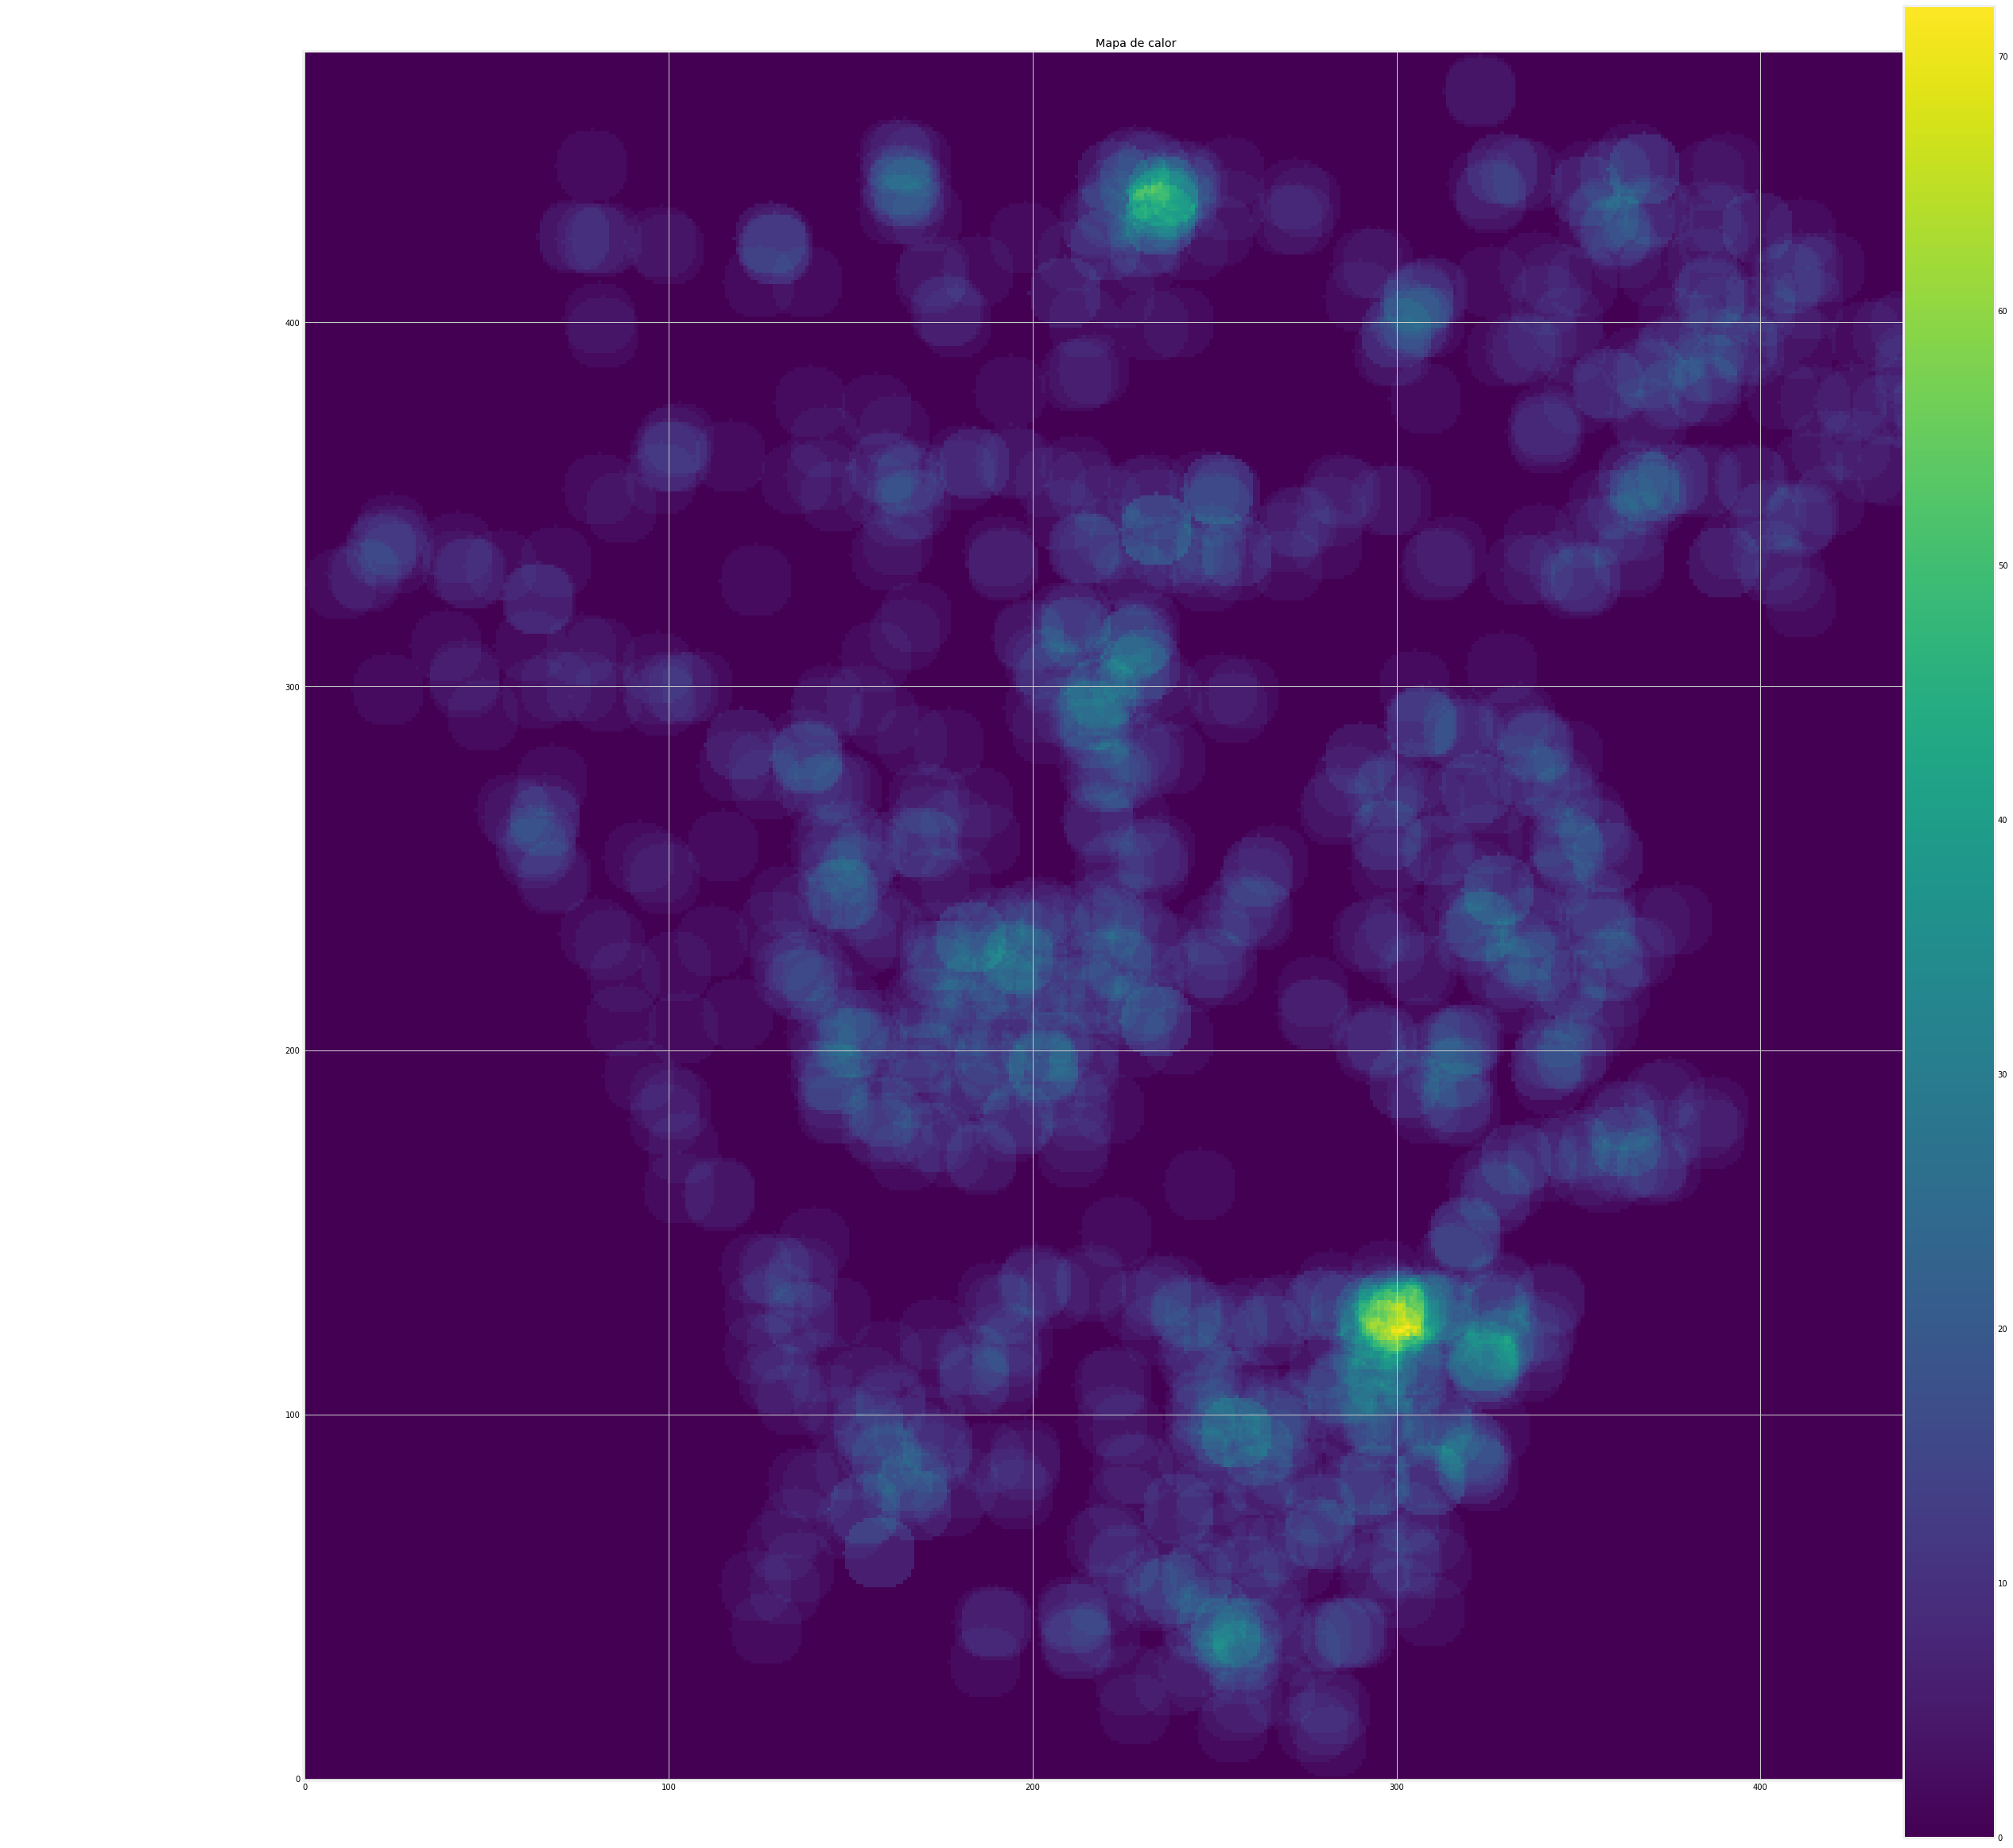

In [275]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(50, 40))
p = list(zip(*M2))[::-1]
ax = fig.add_subplot(111)
ax.set_title('Mapa de calor')
plt.imshow(p)
ax.set_aspect('equal')
ax.reset_position
ax.invert_yaxis()

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')

plt.show()

In [260]:
def triangular(x,ab):
  y = 1-abs(x/ab)
  return y

In [261]:
from numpy.ma.core import sqrt
def gaussiana(x,ab):
  y = (e**(-(x/ab)**2)/2)/np.sqrt(2*pi)
  return y

In [262]:
def epanechnikov(x,ab):
  y = 3/4*(1-(ab/x)**2)
  return y

In [263]:
def varianza_min(x,ab):
  y = 3/8 (3-5(x/ab)**2)
  return y

In [264]:
def uniforme (x,ab):
  y = 0.5 
  return y

In [267]:
def Kernel(d,tip):
  if tip == 1:
    return uniforme(d)
  elif tip == 2:
    return triangular(d)
  elif tip == 3:
    return gaussiana(d)
  elif tip == 4:
    return epanechnikov(d)
  elif tip == 5:
    return varianza_min(d)

In [269]:
def sumatoria(res, ab, len_x, len_y, matriz):
  acumulado = [[0 for i in range(len_x)] for j in range(len_y)] 

  intr = int(ab/res)

  for i in range(len(matriz)):
    for j in range(len(matriz[0])):
      if(matriz[i][j] > 0):
        for k in range(i - intr, i + intr):
          for l in range(j - intr, j + intr):
            dist = (sqrt((i - k)**2 + (j - l)**2)) * res
            if(dist < ab):
              acumulado[k][l] += matriz[i][j]
  
  return acumulado

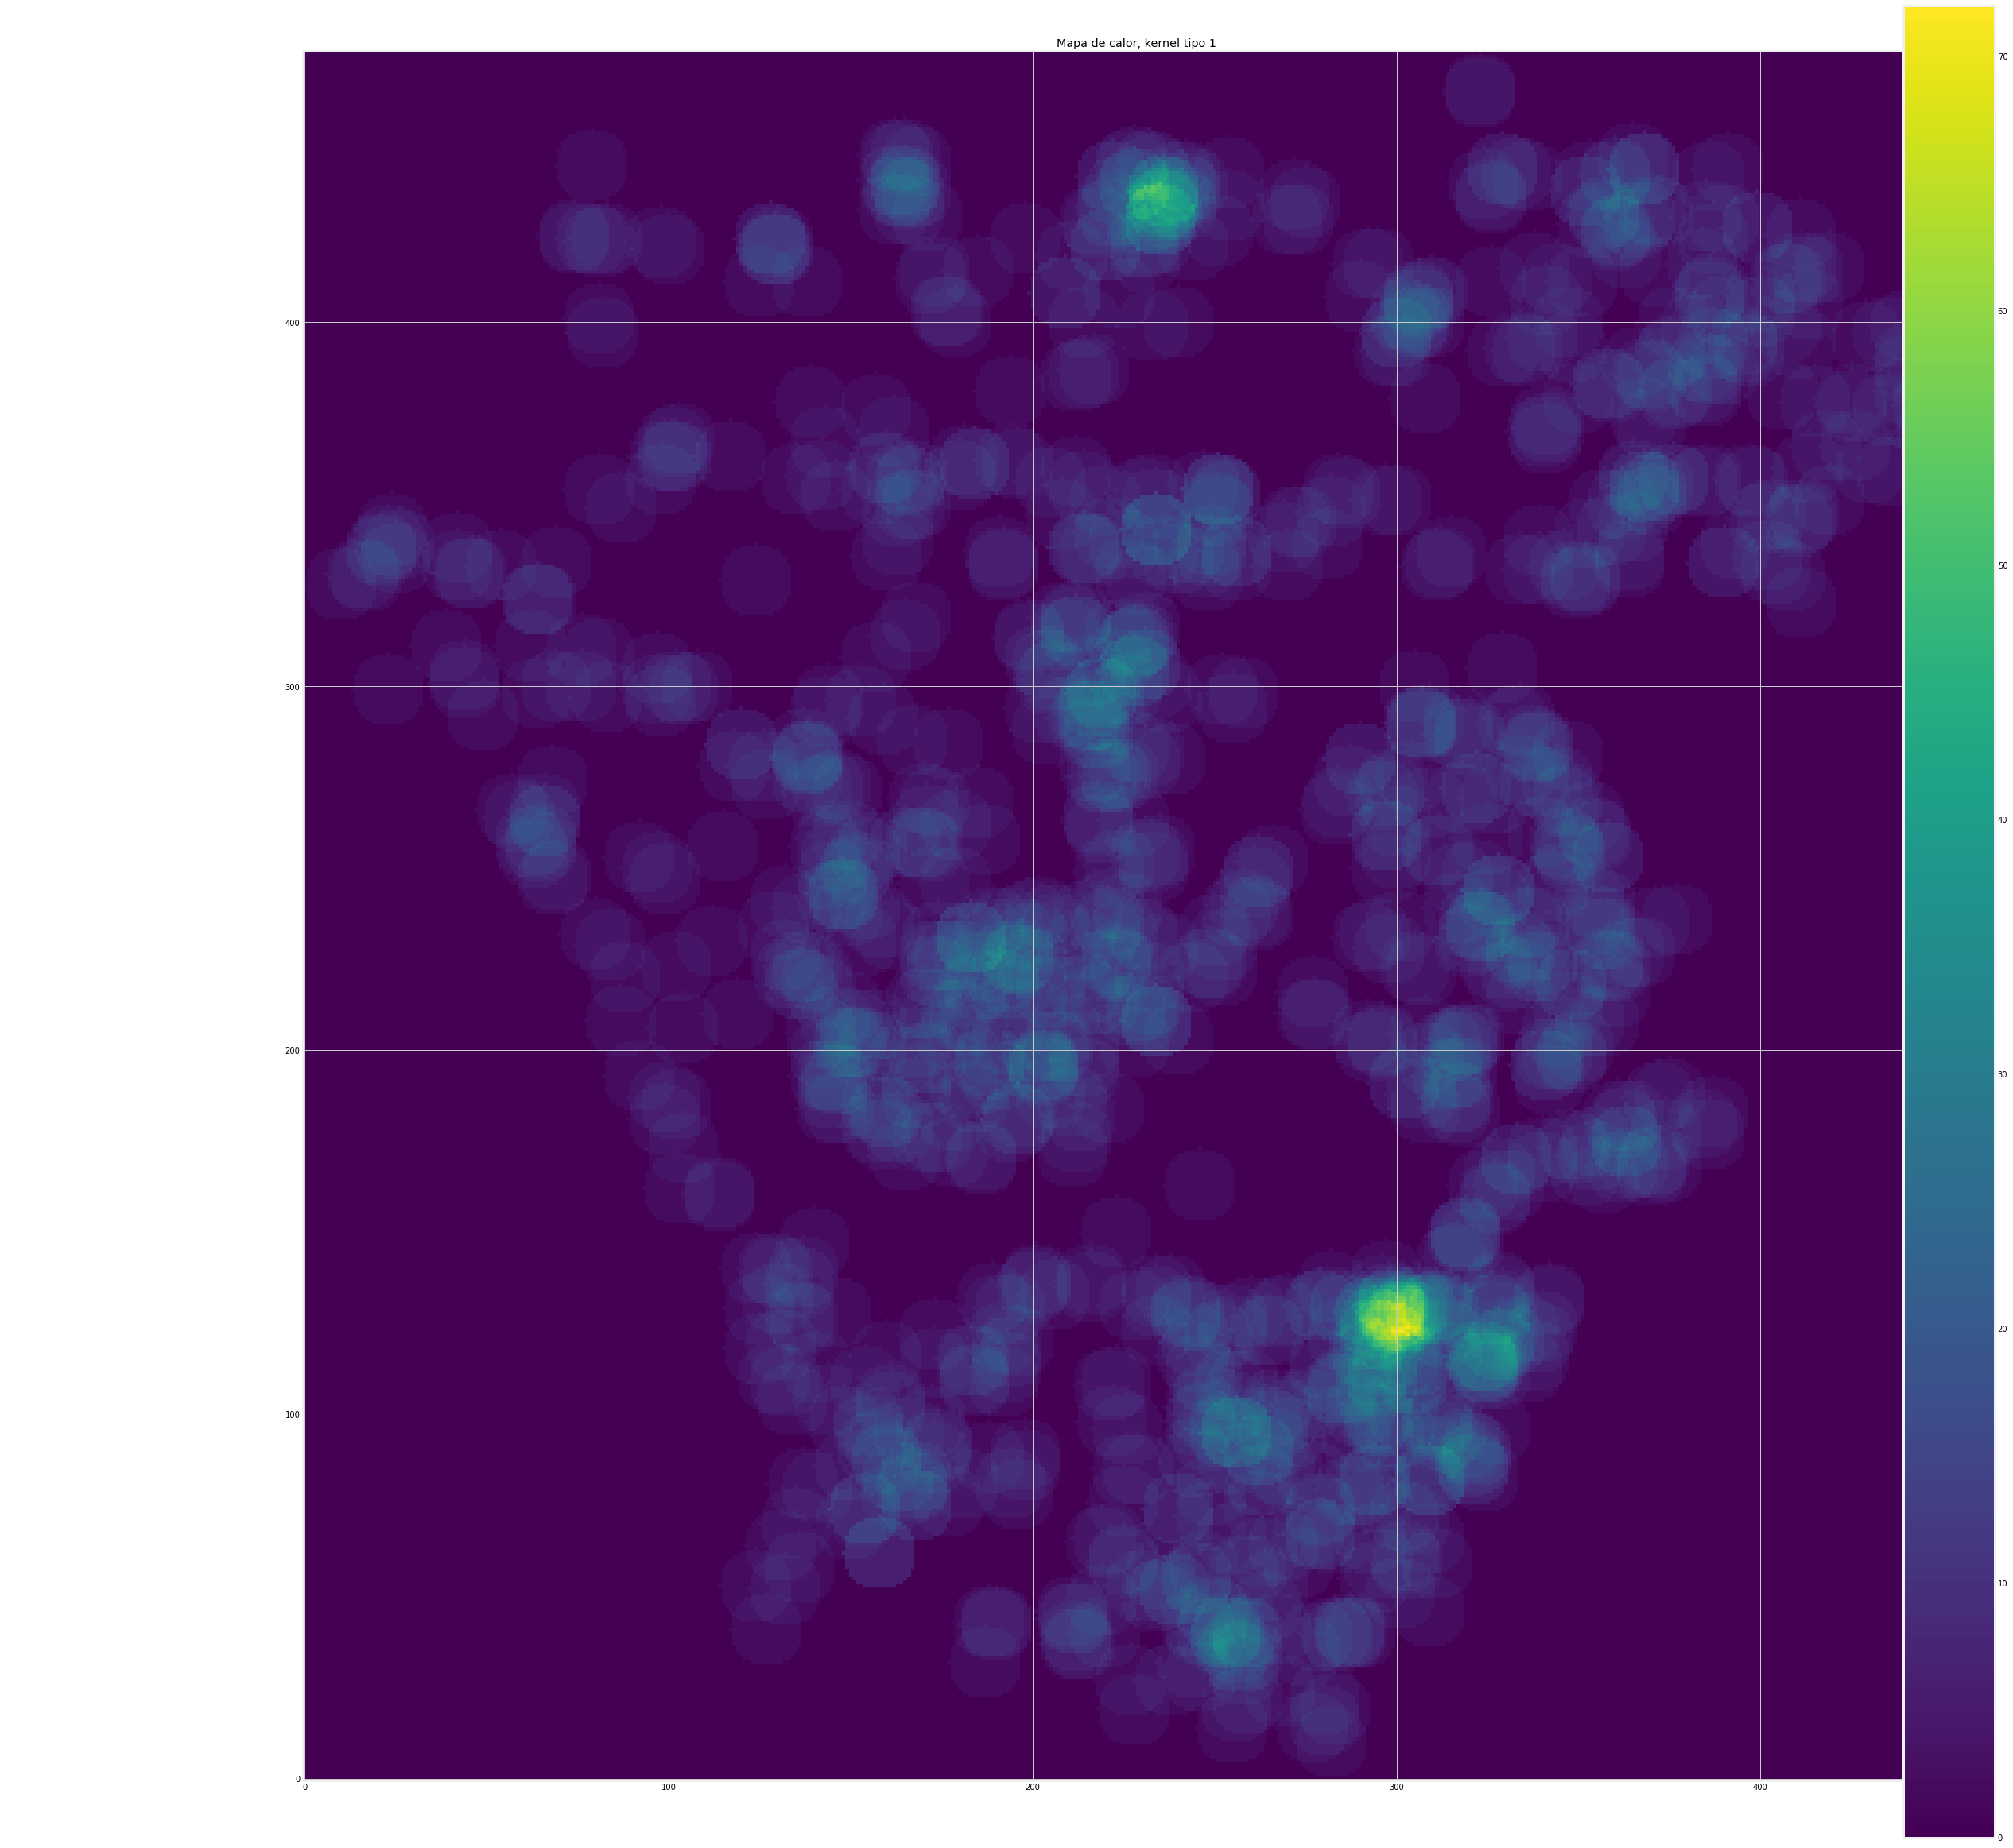

In [276]:
fig = plt.figure(figsize=(50, 40))
p = list(zip(*M2))[::-1]
ax = fig.add_subplot(111)
ax.set_title(f'Mapa de calor, kernel tipo { kernel }')
plt.imshow(p)
ax.set_aspect('equal')
ax.invert_yaxis()

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [270]:
def density(ab, len_x, len_y, matriz, funcion):
  densidad = [[0 for i in range(len_x)] for j in range(len_y)]

  if(funcion == 1):
    for i in range(len(matriz)):
      for j in range(len(matriz[0])):
        densidad[i][j] += uniforme()
  elif(funcion == 2):
    for i in range(len(matriz)):
      for j in range(len(matriz[0])):
        densidad[i][j] += triangular(matriz[i][j], ab)
  elif(funcion == 3):
    for i in range(len(matriz)):
      for j in range(len(matriz[0])):
        densidad[i][j] += gaussiana(matriz[i][j], ab)
  elif(funcion == 4):
    for i in range(len(matriz)):
      for j in range(len(matriz[0])):
        densidad[i][j] += epanechnikov(matriz[i][j], ab)
  elif(funcion == 5):
    for i in range(len(matriz)):
      for j in range(len(matriz[0])):
        densidad[i][j] += varianza_min(matriz[i][j], ab)
  else:
    print("Opción Inválida")
    return 0

  return densidad

In [277]:
!pip install cython 
!pip install cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.4
Uninstalling Shapely-1.8.4:
  Successfully uninstalled Shapely-1.8.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Shapely-1.8.4.tar.gz (199 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.4-cp37-cp37m-linux_x86_64.whl size=669458 sha256=61fb7343850b106549f4927439c80f97a2efd686eeb103f145c0cc25785ed1d9
  Stored in directory: /root/.cache/pip/wheels/0b/f0/55/139a0ab07fbf91378f9b7062842aee4d4bb3566a1fc30ac7a4
Successfully built shapely


In [221]:
import warnings
warnings.filterwarnings('ignore')

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                  
import cartopy.feature as cfeature         
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade

ModuleNotFoundError: ignored

In [224]:
# Obtain the remote shapefile files
import urllib.request

url = 'https://foscalinternacional.com/cartografia/'

file_list = ["68276_manzanas.cpg", "68276_manzanas.dbf", "68276_manzanas.prj", "68276_manzanas.qpj", "68276_manzanas.shp", "68276_manzanas.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

In [228]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(16, 16), subplot_kw=subplot_kw)

# Mapa de floridablanca
lower_lon = -73.125
upper_lon = -73.073
lower_lat = 7.051
upper_lat = 7.102

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_manzanas')

for manzana in reader.geometries():
    ax.add_geometries([manzana], ccrs.PlateCarree(), facecolor='white', edgecolor='black')

ax.add_line
plt.show()

NameError: ignored

In [225]:
import colorsys

def generar_gama(ri,gi,bi,rf,gf,bf,cantidad):
  hsvi = colorsys.rgb_to_hsv(ri/255,gi/255,bi/255)
  return hsvi

In [226]:
def generar_gama (ri,gi,bi,rf,gf,bf,cantidad):
  hsvi=colorsys.rgb_to_hsv(ri/255,gi/255,bi/255)
  hsvf=colorsys.rgb_to_hsv(rf/255,gf/255,bf/255)

  pasoh = (hsvf[0]-hsvi[0])/(cantidad -1)
  pasos = (hsvf[1]-hsvi[1])/(cantidad -1)
  pasov = (hsvf[2]-hsvi[2])/(cantidad -1)

  listaRGB=[]
  listaRGB.append((ri/255,gi/255,bi/255))

  for i in range(cantidad-1):
    h=hsvi[0]+pasoh*(i+1)
    s=hsvi[1]+pasos*(i+1)
    v=hsvi[2]+pasov*(i+1)

    rgb=colorsys.hsv_to_rgb(h,s,v)
    #listaRGB.append([round(rgb[0]*255,0),round(rgb[1]*255,0),round(rgb[2]*255,0)])
    listaRGB.append(rgb)

  return listaRGB


In [229]:
gama = generar_gama (255,0,0,255,255,0,10)
gama

[(1.0, 0.0, 0.0),
 (1.0, 0.11111111111111116, 0.0),
 (1.0, 0.2222222222222222, 0.0),
 (1.0, 0.33333333333333326, 0.0),
 (1.0, 0.4444444444444444, 0.0),
 (1.0, 0.5555555555555556, 0.0),
 (1.0, 0.6666666666666666, 0.0),
 (1.0, 0.7777777777777777, 0.0),
 (1.0, 0.8888888888888888, 0.0),
 (1.0, 1.0, 0.0)]

In [230]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as colors
import math

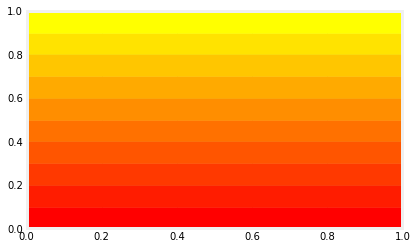

In [231]:
fig=plt.figure()
ax=fig.add_subplot(111)

ratio=1.0
count=len(gama)
x_count=count
y_count=count

x=0
y=0
w=0
n=0
h=1/count

for cl in gama:
  pos=(x/count,y/count)
  ax.add_patch(patches.Rectangle(pos,1,h,color=cl))
  #ax.annotate(cl,xy=pos)
  if y>=count-1:
    x+=1
    y=0
  else:
    y+=1

plt.show()

In [232]:
res = df.copy(deep=True) 
res.dtypes

ID                            int64
fec_not                      object
semana                        int64
año                           int64
edad_                         int64
uni_med_                      int64
sexo_                        object
cod_pais_o                    int64
cod_dpto_o                    int64
cod_mun_o                     int64
area_                         int64
ocupacion_                    int64
tip_ss_                      object
cod_ase_                     object
gp_discapa                    int64
gp_desplaz                    int64
gp_migrant                    int64
gp_carcela                    int64
gp_gestan                     int64
gp_calle                      int64
gp_psiquia                    int64
gp_vic_vio                    int64
fecha_contagio               object
inicio_sintomas              object
pac_hos_                      int64
fec_hos_                     object
condicion_final               int64
fecha_defuncion             

In [279]:
res = res.drop('ID', axis=1)
res = res.drop('semana', axis=1)
res = res.drop('conducta', axis=1)
res = res.drop('sexo_', axis=1)
res = res.drop('tip_ss_', axis=1)
res = res.drop('cod_ase_', axis=1)
res = res.drop('fecha_contagio', axis=1)
res = res.drop('inicio_sintomas', axis=1)
res = res.drop('fec_hos_', axis=1)
res = res.drop('fecha_nacimiento', axis=1)
res = res.drop('latitud', axis=1)
res = res.drop('longitud', axis=1)
res = res.drop('x', axis=1)
res = res.drop('y', axis=1)
res = res.drop('año', axis=1)
res = res.drop('edad_', axis=1)
res = res.drop('uni_med_', axis=1)
res = res.drop('cod_pais_o', axis=1)
res = res.drop('cod_dpto_o', axis=1)
res = res.drop('cod_mun_o', axis=1)
res = res.drop('ocupacion_', axis=1)
res = res.drop('condicion_final', axis=1)
res = res.drop('fecha_defuncion', axis=1)
res = res.drop('certif_defuncion', axis=1)
res = res.drop('fiebre', axis=1)
res = res.drop('fec_not2', axis=1)
res = res.drop('fecha_contagio2', axis=1)
res = res.drop('inicio_sintomas2', axis=1)
res = res.drop('fec_hos_2', axis=1)
res = res.drop('fec_not', axis=1)

AttributeError: ignored

In [280]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [234]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [272]:
lista_datos = res.to_numpy().tolist()
res2 = StandardScaler()
d_normalizado = res2.fit_transform(lista_datos)
d_normalizado[:5]

AttributeError: ignored

In [ ]:
kmeans = KMeans(
  init="random",
  n_clusters=4,
  n_init=1,
  max_iter=1000,
  random_state=42
)

In [ ]:
kmeans_kwargs = {
  "init": "random",
  "n_init": 1,
  "max_iter": 1000,
  "random_state": 42,
}

sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(d_normalizado)
  sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
kl = KneeLocator(
  range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

In [ ]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluester
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(d_normalizado)
  score = silhouette_score(d_normalizado, kmeans.labels_)
  silhouette_coefficients.append(score)

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()